In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import os

# Definir la ruta a la carpeta de datos
data_folder_path = "/content/drive/Shareddrives/GEINCyR - Ciencias Sociales Computacionales Heterodoxas (CSCH)/Carpeta de trabajo/Corruption Network/data"



In [76]:
# Nombre del archivo .graphml
filename = "grafo_ind_ind_cat_main_component.graphml"

# Construir la ruta completa al archivo
file_path = os.path.join(data_folder_path, filename)

# Asegurarte de que el archivo existe
if os.path.exists(file_path):
    print("El archivo existe.")
else:
    print("El archivo no existe.")

El archivo existe.


{}

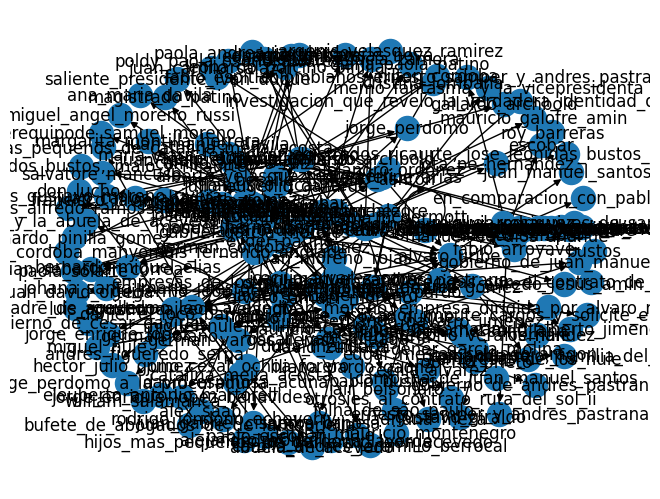

In [77]:
import pandas as pd
import networkx as nx

# read graphml
G = nx.read_graphml(file_path)

# plot graph
nx.draw(G, with_labels=True)
# plot labels
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G), edge_labels=labels)

In [78]:
# Mostrar los nodos
print("Nodos del grafo: ", G.nodes())

# Mostrar las aristas
print("Aristas del grafo: ", G.edges())

Nodos del grafo:  ['juan_camilo_salazar', 'fabio_espitia', 'andres_felipe_arias', 'ines_margarita_vives_lacouture', 'jose_francisco_vives_lacouture', 'jose_benito_vives_d’andreis', 'luis_eduardo_vives_lacouture', 'alvaro_luis_vives_lacouture', 'roberto_eusebio_vives_lacouture', 'patricia_vives_lacouture', 'maria_teresa_vives_lacouture', 'maria_luisa_zuniva_vivez', 'silvia_rosa_vives_de_sanchez', 'silvia_rosa_campo_vives', 'martin_moreno', 'juan_david_ortega', 'johana_santa_maria', 'javier_enrique_romero', 'rodolfo_campo_soto', 'alejandro_ordonez', 'camilo_andres_ruiz', 'gustavo_malo', 'milton_cordoba_manyoma', 'argenis_velasquez_ramirez', 'musa_besaile', 'francisco_javier_ricaurte_gomez', 'luis_gustavo_moreno', 'alvaro_ashton', 'francisco_ricaurte', 'leonidas_bustos', 'pablo_bustos', 'mauricio_cardenas_santamaria', 'juan_manuel_santos', 'andres_pastrana', 'cesar_gaviria', 'nestor_humberto_martinez', 'fabian_mauricio_montenegro', 'salvatore_mancuso', 'lucas_gnecco_cerchar', 'jose_alfred

In [ ]:
# Mostrar los tipos de las aristas
for edge in G.edges(data=True):
    print("De nodo {0} a nodo {1} con relación {2}".format(edge[0], edge[1], edge[2]))

In [80]:
#Crear un grafo multiplexo
F = nx.MultiDiGraph()
#Añadiremos los siguientes nodos.
Nodos = G.nodes()

for nodo in Nodos:
    F.add_node(nodo)

#Añadiremos los enlaces

# Mover las aristas de G a F, convirtiendo las etiquetas en relaciones
for edge in G.edges(data=True):
    F.add_edge(edge[0], edge[1], relation=edge[2]['label'])

# Mostrar los nodos y las aristas de F
print("Nodos del grafo F: ", F.nodes())
print("Aristas del grafo F: ", F.edges(data=True))

Nodos del grafo F:  ['juan_camilo_salazar', 'fabio_espitia', 'andres_felipe_arias', 'ines_margarita_vives_lacouture', 'jose_francisco_vives_lacouture', 'jose_benito_vives_d’andreis', 'luis_eduardo_vives_lacouture', 'alvaro_luis_vives_lacouture', 'roberto_eusebio_vives_lacouture', 'patricia_vives_lacouture', 'maria_teresa_vives_lacouture', 'maria_luisa_zuniva_vivez', 'silvia_rosa_vives_de_sanchez', 'silvia_rosa_campo_vives', 'martin_moreno', 'juan_david_ortega', 'johana_santa_maria', 'javier_enrique_romero', 'rodolfo_campo_soto', 'alejandro_ordonez', 'camilo_andres_ruiz', 'gustavo_malo', 'milton_cordoba_manyoma', 'argenis_velasquez_ramirez', 'musa_besaile', 'francisco_javier_ricaurte_gomez', 'luis_gustavo_moreno', 'alvaro_ashton', 'francisco_ricaurte', 'leonidas_bustos', 'pablo_bustos', 'mauricio_cardenas_santamaria', 'juan_manuel_santos', 'andres_pastrana', 'cesar_gaviria', 'nestor_humberto_martinez', 'fabian_mauricio_montenegro', 'salvatore_mancuso', 'lucas_gnecco_cerchar', 'jose_alfr

In [81]:
from collections import Counter

# 1. Número de nodos
num_nodos = F.number_of_nodes()
print("Número de nodos: ", num_nodos)

# 2. Número de aristas
num_aristas = F.number_of_edges()
print("Número de aristas: ", num_aristas)

# 3. Densidad del grafo
# La densidad del grafo es el número de aristas dividido por el número máximo posible de aristas
densidad = nx.density(F)
print("Densidad del grafo: ", densidad)

# 4. Grado medio
# El grado de un nodo en un MultiDiGraph cuenta todas las aristas, incluyendo múltiples aristas entre los mismos nodos
grados = [F.degree(n) for n in F.nodes()]
grado_medio = sum(grados) / num_nodos
print("Grado medio: ", grado_medio)


# Crear un vector con los tipos de relaciones
tipos_relaciones = [data['relation'] for u, v, data in F.edges(data=True)]
print("Tipos de relaciones: ", tipos_relaciones)

# Contar cuántas veces se repite cada tipo de relación
contador_relaciones = Counter(tipos_relaciones)
print("Conteo de relaciones: ", contador_relaciones)

Número de nodos:  191
Número de aristas:  312
Densidad del grafo:  0.008597409754753376
Grado medio:  3.2670157068062826
Tipos de relaciones:  ['relacionesDeInfluencia', 'relacionesDeCorrupcion', 'relacionesDeCorrupcion', 'relacionNoReconocida', 'relacionNoReconocida', 'relacionNoReconocida', 'relacionNoReconocida', 'relacionNoReconocida', 'relacionesDeCorrupcion', 'relacionesFamiliares', 'relacionesFamiliares', 'relacionesFamiliares', 'relacionesFamiliares', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'RelacionesDeInvestigacion', 'relacionNoReconocida', 'RelacionesDeInvestigacion', 'relacionNoReconocida', 'relacionNoReconocida', 'relacionNoReconocida', 'rela

In [82]:
from collections import Counter

# Calcular el total de relaciones
total_relaciones = sum(contador_relaciones.values())

# Calcular las frecuencias de cada tipo de relación
frecuencias_relaciones = {tipo: count / total_relaciones for tipo, count in contador_relaciones.items()}

print("Frecuencias de relaciones: ", frecuencias_relaciones)

# Verificar que la suma de las frecuencias es igual a 1
print("Suma de las frecuencias: ", sum(frecuencias_relaciones.values()))

Frecuencias de relaciones:  {'relacionesDeInfluencia': 0.125, 'relacionesDeCorrupcion': 0.09294871794871795, 'relacionNoReconocida': 0.5064102564102564, 'relacionesFamiliares': 0.04487179487179487, 'RelacionesDeInvestigacion': 0.125, 'relacionesProfesionales': 0.10576923076923077}
Suma de las frecuencias:  0.9999999999999999


In [83]:
import math

# Calcular la entropía de Shannon
entropia = -sum(p * math.log2(p) for p in frecuencias_relaciones.values())
print("Entropía de Shannon: ", entropia)

# Calcular los factores sorpresa
factores_sorpresa = {tipo: -math.log2(p) for tipo, p in frecuencias_relaciones.items()}
print("Factores sorpresa: ", factores_sorpresa)

# Argumentar qué tipo de relaciones aportan más o menos información
for tipo, factor in factores_sorpresa.items():
    print(f"La relación '{tipo}' aporta {'más' if factor > entropia else 'menos'} información que el promedio.")

Entropía de Shannon:  2.109414542613618
Factores sorpresa:  {'relacionesDeInfluencia': 3.0, 'relacionesDeCorrupcion': 3.4274212237346764, 'relacionNoReconocida': 0.9816214706851455, 'relacionesFamiliares': 4.478047296804644, 'RelacionesDeInvestigacion': 3.0, 'relacionesProfesionales': 3.241008099503795}
La relación 'relacionesDeInfluencia' aporta más información que el promedio.
La relación 'relacionesDeCorrupcion' aporta más información que el promedio.
La relación 'relacionNoReconocida' aporta menos información que el promedio.
La relación 'relacionesFamiliares' aporta más información que el promedio.
La relación 'RelacionesDeInvestigacion' aporta más información que el promedio.
La relación 'relacionesProfesionales' aporta más información que el promedio.


In [84]:
import matplotlib.pyplot as plt

# Extraer los tipos de relaciones y los factores de sorpresa
tipos = list(factores_sorpresa.keys())
sorpresas = list(factores_sorpresa.values())

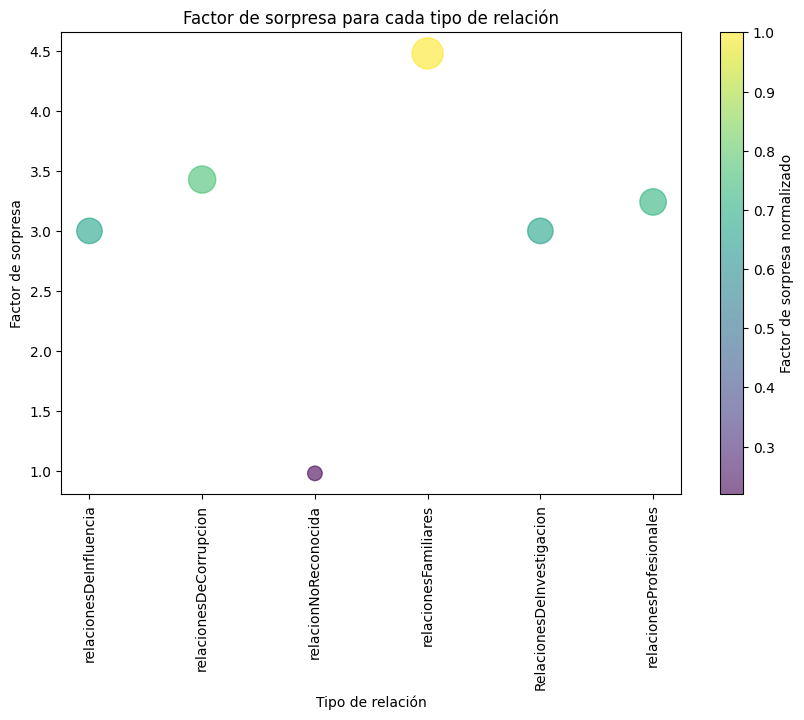

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Extraer los tipos de relaciones y los factores de sorpresa
tipos = list(factores_sorpresa.keys())[:20]
sorpresas = list(factores_sorpresa.values())[:20]

# Normalizar los factores de sorpresa para usarlos como tamaños de los puntos
# Multiplicamos por 100 para que los puntos sean visibles
sizes = [500 * (s / max(sorpresas)) for s in sorpresas]

# Normalizar los factores de sorpresa para usarlos como colores
colors = sorpresas / np.max(sorpresas)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(tipos, sorpresas, s=sizes, c=colors, cmap='viridis', alpha=0.6)
plt.xlabel('Tipo de relación')
plt.ylabel('Factor de sorpresa')
plt.title('Factor de sorpresa para cada tipo de relación')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles

# Añadir una barra de colores
cbar = plt.colorbar(scatter)
cbar.set_label('Factor de sorpresa normalizado')

plt.show()

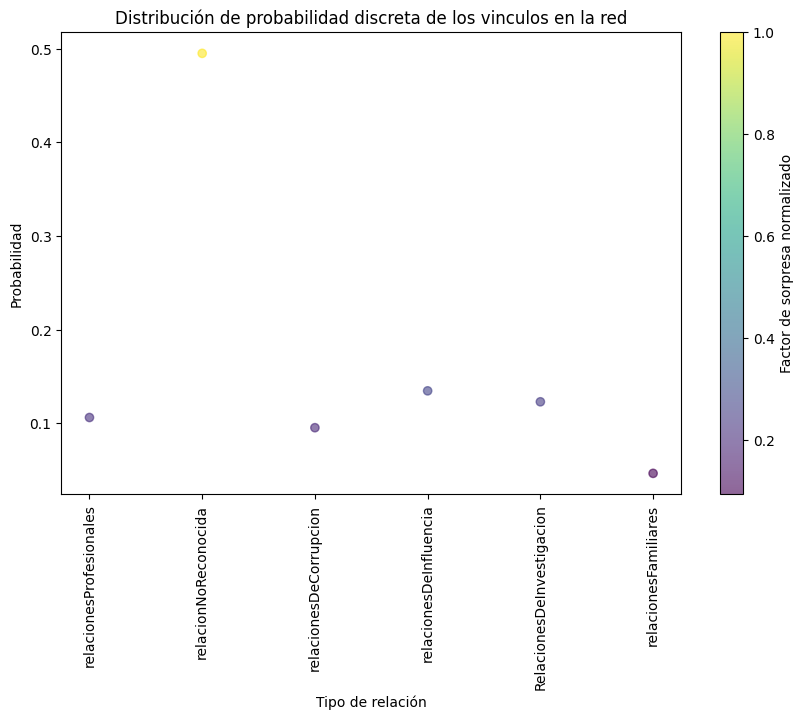

In [173]:
sorpresas = list(frecuencias_relaciones.values())

# Normalizar los factores de sorpresa para usarlos como tamaños de los puntos
# Multiplicamos por 100 para que los puntos sean visibles
sizes = [500 * (s / max(sorpresas)) for s in sorpresas]

# Normalizar los factores de sorpresa para usarlos como colores
colors = sorpresas / np.max(sorpresas)


plt.figure(figsize=(10, 6))
scatter = plt.scatter(frecuencias_relaciones.keys(), frecuencias_relaciones.values(), c=colors, cmap='viridis', alpha=0.6)
plt.xlabel('Tipo de relación')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad discreta de los vinculos en la red')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para que sean legibles

# Añadir una barra de colores
cbar = plt.colorbar(scatter)
cbar.set_label('Factor de sorpresa normalizado')

plt.show()

In [86]:
# Crear un diccionario vacío para almacenar los grados de los nodos
grados_nodos = {}

# Iterar sobre cada nodo en el grafo
for nodo in F.nodes():
    # Calcular el grado del nodo y almacenarlo en el diccionario
    grados_nodos[nodo] = F.degree(nodo)

print(grados_nodos)

{'juan_camilo_salazar': 2, 'fabio_espitia': 1, 'andres_felipe_arias': 8, 'ines_margarita_vives_lacouture': 11, 'jose_francisco_vives_lacouture': 11, 'jose_benito_vives_d’andreis': 2, 'luis_eduardo_vives_lacouture': 2, 'alvaro_luis_vives_lacouture': 2, 'roberto_eusebio_vives_lacouture': 2, 'patricia_vives_lacouture': 2, 'maria_teresa_vives_lacouture': 2, 'maria_luisa_zuniva_vivez': 2, 'silvia_rosa_vives_de_sanchez': 2, 'silvia_rosa_campo_vives': 2, 'martin_moreno': 6, 'juan_david_ortega': 2, 'johana_santa_maria': 1, 'javier_enrique_romero': 2, 'rodolfo_campo_soto': 4, 'alejandro_ordonez': 2, 'camilo_andres_ruiz': 5, 'gustavo_malo': 10, 'milton_cordoba_manyoma': 1, 'argenis_velasquez_ramirez': 1, 'musa_besaile': 5, 'francisco_javier_ricaurte_gomez': 5, 'luis_gustavo_moreno': 33, 'alvaro_ashton': 9, 'francisco_ricaurte': 7, 'leonidas_bustos': 13, 'pablo_bustos': 3, 'mauricio_cardenas_santamaria': 14, 'juan_manuel_santos': 11, 'andres_pastrana': 3, 'cesar_gaviria': 2, 'nestor_humberto_mart

In [178]:
print(F.nodes())

['juan_camilo_salazar', 'fabio_espitia', 'andres_felipe_arias', 'ines_margarita_vives_lacouture', 'jose_francisco_vives_lacouture', 'jose_benito_vives_d’andreis', 'luis_eduardo_vives_lacouture', 'alvaro_luis_vives_lacouture', 'roberto_eusebio_vives_lacouture', 'patricia_vives_lacouture', 'maria_teresa_vives_lacouture', 'maria_luisa_zuniva_vivez', 'silvia_rosa_vives_de_sanchez', 'silvia_rosa_campo_vives', 'martin_moreno', 'juan_david_ortega', 'johana_santa_maria', 'javier_enrique_romero', 'rodolfo_campo_soto', 'alejandro_ordonez', 'camilo_andres_ruiz', 'gustavo_malo', 'milton_cordoba_manyoma', 'argenis_velasquez_ramirez', 'musa_besaile', 'francisco_javier_ricaurte_gomez', 'luis_gustavo_moreno', 'alvaro_ashton', 'francisco_ricaurte', 'leonidas_bustos', 'pablo_bustos', 'mauricio_cardenas_santamaria', 'juan_manuel_santos', 'andres_pastrana', 'cesar_gaviria', 'nestor_humberto_martinez', 'fabian_mauricio_montenegro', 'salvatore_mancuso', 'lucas_gnecco_cerchar', 'jose_alfredo_gnecco', 'frankl

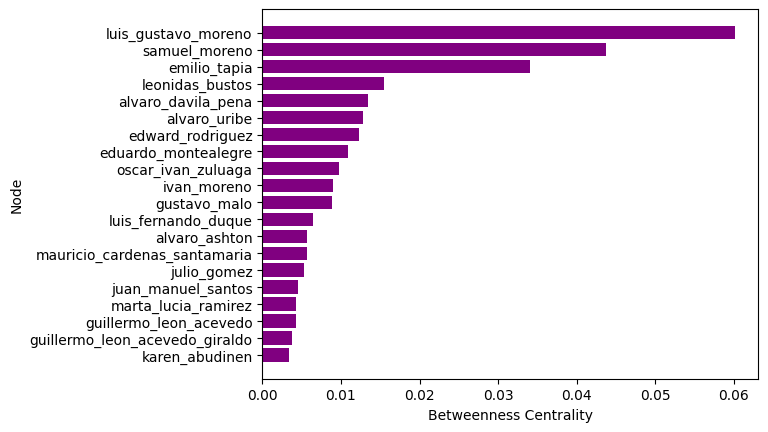

In [186]:
import networkx as nx
import matplotlib.pyplot as plt

# Calcula el betweenness centrality para el grafo F
betweenness = nx.betweenness_centrality(F, normalized=True)

# Ordena los nodos por betweenness centrality
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

# Selecciona solo los 20 nodos con mayor betweenness centrality
top_20_betweenness = sorted_betweenness[:20]

# Extrae los nombres de los nodos y los valores de betweenness centrality
node_names = [node for node, _ in top_20_betweenness]
betweenness_values = [value for _, value in top_20_betweenness]

# Crea una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Crea un gráfico de barras horizontales
ax.barh(node_names, betweenness_values, color='purple')

# Invierte el eje y para que los nodos con mayor betweenness centrality aparezcan en la parte superior
ax.invert_yaxis()

# Etiqueta los ejes
ax.set_xlabel('Betweenness Centrality')
ax.set_ylabel('Node')

# Muestra el gráfico
plt.show()

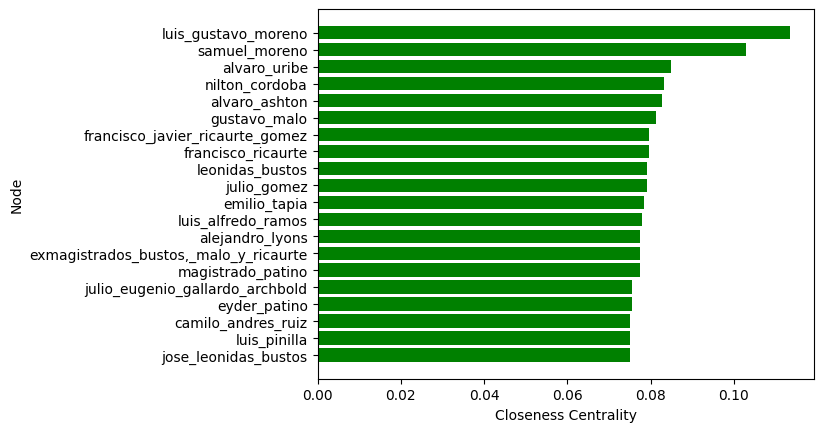

In [188]:
import networkx as nx
import matplotlib.pyplot as plt

# Calcula el closeness centrality para el grafo F
closeness = nx.closeness_centrality(F)

# Ordena los nodos por closeness centrality
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# Selecciona solo los 20 nodos con mayor closeness centrality
top_20_closeness = sorted_closeness[:20]

# Extrae los nombres de los nodos y los valores de closeness centrality
node_names = [node for node, _ in top_20_closeness]
closeness_values = [value for _, value in top_20_closeness]

# Crea una figura y un eje para el gráfico
fig, ax = plt.subplots()

# Crea un gráfico de barras horizontales
ax.barh(node_names, closeness_values, color='green')

# Invierte el eje y para que los nodos con mayor closeness centrality aparezcan en la parte superior
ax.invert_yaxis()

# Etiqueta los ejes
ax.set_xlabel('Closeness Centrality')
ax.set_ylabel('Node')

# Muestra el gráfico
plt.show()

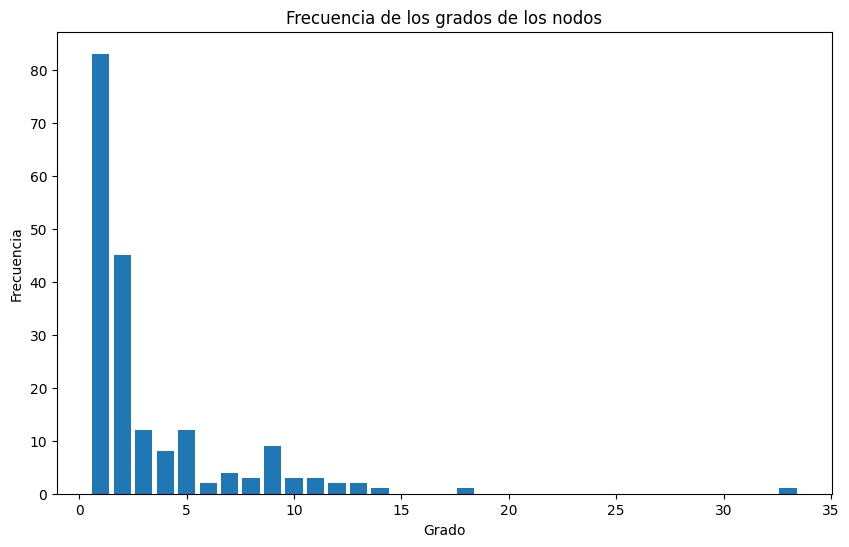

In [87]:
import matplotlib.pyplot as plt
from collections import Counter

# Crear un diccionario vacío para almacenar los grados de los nodos
grados_nodos = {}

# Iterar sobre cada nodo en el grafo
for nodo in F.nodes():
    # Calcular el grado del nodo y almacenarlo en el diccionario
    grados_nodos[nodo] = F.degree(nodo)

# Contar la frecuencia de cada grado
frecuencia_grados = Counter(grados_nodos.values())

# Crear una lista con los grados y otra con sus frecuencias
grados = list(frecuencia_grados.keys())
frecuencias = list(frecuencia_grados.values())

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(grados, frecuencias)
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los grados de los nodos')
plt.show()

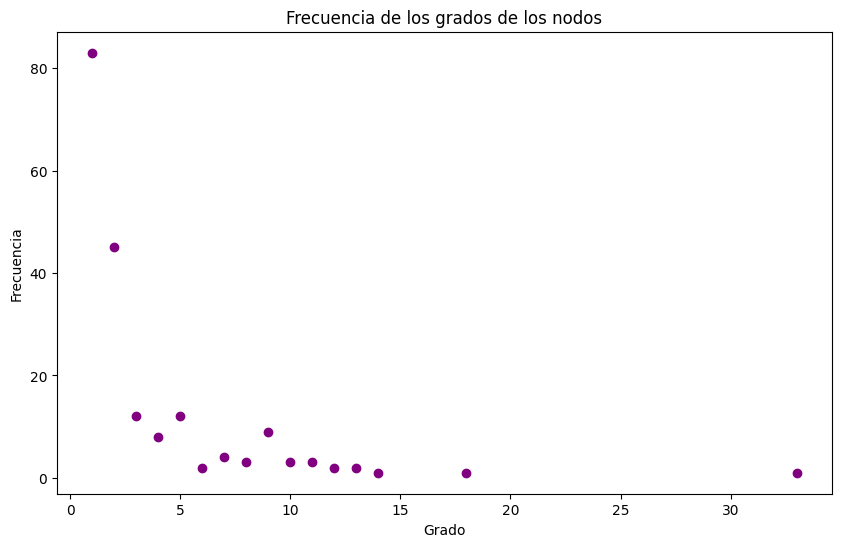

In [88]:
import matplotlib.pyplot as plt
from collections import Counter

# Crear un diccionario vacío para almacenar los grados de los nodos
grados_nodos = {}

# Iterar sobre cada nodo en el grafo
for nodo in F.nodes():
    # Calcular el grado del nodo y almacenarlo en el diccionario
    grados_nodos[nodo] = F.degree(nodo)

# Contar la frecuencia de cada grado
frecuencia_grados = Counter(grados_nodos.values())

# Crear una lista con los grados y otra con sus frecuencias
grados = list(frecuencia_grados.keys())
frecuencias = list(frecuencia_grados.values())

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(grados, frecuencias, color='purple')
plt.xlabel('Grado')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los grados de los nodos')
plt.show()

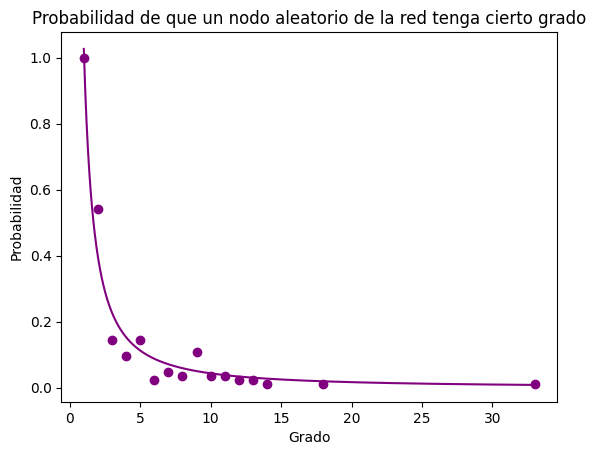

probabilidad:  0.9003492706585049 %
85.17314217310901 -1.3725507215739974


In [171]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Tus datos
grados = np.array(grados)
frecuencias = np.array(frecuencias)

def power_law(x, a, b):
    return a*np.power(x, b)

# Ajustar la función de potencias a los datos
params, params_covariance = curve_fit(power_law, grados, frecuencias)

# Crear una serie de puntos x para la función ajustada
x_fit = np.linspace(min(grados), max(grados), num=1000)

# Calcular los valores y correspondientes para la función ajustada
y_fit = power_law(x_fit, params[0], params[1])

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Graficar los datos originales como puntos
ax.scatter(grados, frecuencias/max(frecuencias), color='purple')

# Graficar la función ajustada como una línea
ax.plot(x_fit, y_fit/max(frecuencias), color='purple')
plt.xlabel('Grado')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de que un nodo aleatorio de la red tenga cierto grado')
# Mostrar la gráfica
plt.show()

# Calcular valores de probabilidad (probabilidad de que un nodo tenga grado K=6)
y_6 = power_law(1.1, params[0], params[1])/max(frecuencias)
print('probabilidad: ', y_6, '%')
print(params[0],params[1])

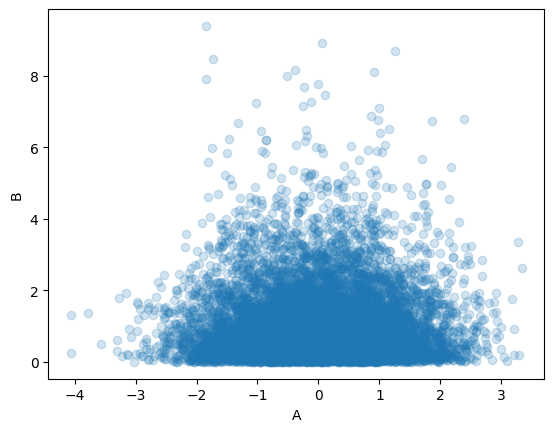

In [91]:
import numpy as np
import matplotlib.pyplot as plt

# Genera muestras de dos distribuciones
samples_A = np.random.normal(loc=0, scale=1, size=10000)
samples_B = np.random.exponential(scale=1, size=10000)

#Muestras

# Combina las muestras para formar pares
joint_samples = list(zip(samples_A, samples_B))

# Grafica las muestras
plt.scatter(samples_A, samples_B, alpha=0.2)
plt.xlabel('A')
plt.ylabel('B')
plt.show()



In [92]:

# Define los rangos de interés
range_A = (-1, 1)
range_B = (0, 2)

# Cuenta el número de muestras que caen dentro de los rangos
count = sum((range_A[0] <= a <= range_A[1]) and (range_B[0] <= b <= range_B[1]) for a, b in joint_samples)

# Calcula la probabilidad
probability = count / len(joint_samples)

print("Probabilidad estimada: ", probability)

Probabilidad estimada:  0.5898


In [93]:
import random
# Diccionario con estados y sus probabilidades
probabilidades = frecuencias_relaciones

# Extrae los estados y las probabilidades en listas separadas
estados = list(probabilidades.keys())
pesos = list(probabilidades.values())

# Genera un estado aleatorio siguiendo la distribución de probabilidad
estado_aleatorio = random.choices(estados, weights=pesos, k=40)

print(estado_aleatorio)

# Contar cuántas veces se repite cada tipo de relación
contador_relaciones = Counter(estado_aleatorio)
# Calcular el total de relaciones
total_relaciones = sum(contador_relaciones.values())

# Calcular las frecuencias de cada tipo de relación
frecuencias_relaciones = {tipo: count / total_relaciones for tipo, count in contador_relaciones.items()}

print(frecuencias_relaciones)

['relacionNoReconocida', 'relacionesDeInfluencia', 'relacionesFamiliares', 'relacionNoReconocida', 'relacionesDeCorrupcion', 'relacionesDeCorrupcion', 'relacionNoReconocida', 'relacionesFamiliares', 'relacionNoReconocida', 'relacionNoReconocida', 'RelacionesDeInvestigacion', 'relacionesProfesionales', 'RelacionesDeInvestigacion', 'relacionesProfesionales', 'relacionNoReconocida', 'relacionesProfesionales', 'RelacionesDeInvestigacion', 'relacionesDeCorrupcion', 'relacionNoReconocida', 'relacionesProfesionales', 'relacionesDeCorrupcion', 'RelacionesDeInvestigacion', 'relacionNoReconocida', 'relacionesDeInfluencia', 'RelacionesDeInvestigacion', 'relacionNoReconocida', 'relacionNoReconocida', 'relacionesDeCorrupcion', 'relacionesDeInfluencia', 'relacionNoReconocida', 'relacionesDeInfluencia', 'relacionNoReconocida', 'relacionNoReconocida', 'RelacionesDeInvestigacion', 'relacionNoReconocida', 'relacionesDeCorrupcion', 'relacionesProfesionales', 'relacionNoReconocida', 'relacionNoReconocida'

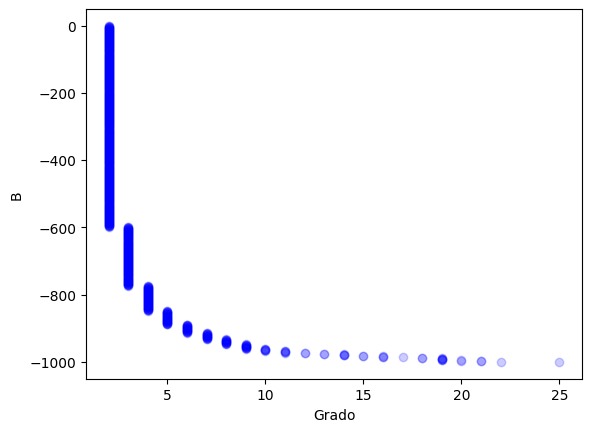

5.893356928422491 2.070416705137651 0.7996111204095139 0.39662507202445096
[1.0604454233173244, 1.2930073222180678, 1.3231907105088736, 1.3789027148230775, 1.4691833044280878, 1.482230190958858, 1.4977575981546922, 1.503034283455217, 1.5041412033917494, 1.5509902188423073, 1.556958226071769, 1.5618333523382995, 1.6525901063502932, 1.7279354680173133, 1.8169157903104827, 1.9524300200409537, 1.9897546152132837, 2.043435839699298, 2.1042336349632036, 2.1109264598115383, 2.3156359431901485, 2.335287497329441, 2.5022842606225044, 2.514688489863372, 2.549642194558987, 2.6799482493658733, 2.89214165713895, 2.9331262311065256, 3.1845978656341654, 3.2584456402298216, 3.2589960866391916, 3.3513446081095557, 3.441518397374727, 3.81069184714206, 3.8789022259862826, 3.9943669664382404, 4.141974639688901, 4.150942973954599, 4.168073993632257, 4.284843831445965, 4.3729744489081686, 4.418606050856308, 4.419234888645757, 4.4279687003950166, 4.520394066727563, 4.58426934669637, 4.680194305614717, 4.7174

In [94]:
import numpy as np
import matplotlib.pyplot as plt


uniform_random_numbers = np.random.uniform(1, max(frecuencias), 1000)

# Aplica la función de distribución acumulativa inversa a los números aleatorios uniformes
random_numbers = power_law(sorted(uniform_random_numbers), params[0], params[1])

# Crea un vector x
x = range(-1000, 0)

import math


#Función inversa (Ingresas una frecuencia y te devuelve un grado)
def obtener_grado(f):
    return np.power(f/params[0],1/params[1])

random_numbers2 = obtener_grado(sorted(uniform_random_numbers))

# Grafica las muestras
#plt.scatter(np.ceil(random_numbers),sorted(x), alpha=0.2, color='b')
plt.scatter(np.ceil(random_numbers2),sorted(x), alpha=0.2, color='b')

plt.xlabel('Grado')
plt.ylabel('B')
plt.show()


print(power_law(7, params[0], params[1]), power_law(15, params[0], params[1]), power_law(30, params[0], params[1]), power_law(50, params[0], params[1]))
print(sorted(uniform_random_numbers))
#print(sorted(random_numbers))
#print(np.ceil(random_numbers))
print(len(np.ceil(random_numbers2)))
#print("a : ", obtener_grado(random_numbers))


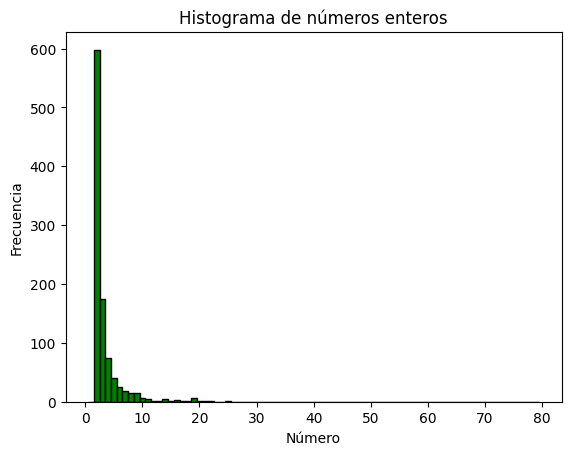

In [95]:
import matplotlib.pyplot as plt

# Crear histograma
plt.hist(np.ceil(random_numbers2), bins=range(int(min(np.ceil(random_numbers))), int(max(np.ceil(random_numbers))) + 2), align='left', color='g', edgecolor='black')

plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.title('Histograma de números enteros')

plt.show()

In [154]:
# Genera un estado aleatorio siguiendo la distribución de probabilidad (K representa el número de muestras)
estado_aleatorio = random.choices(estados, weights=pesos, k=10000)

# Contar cuántas veces se repite cada tipo de relación
contador_relaciones = Counter(estado_aleatorio)
# Calcular el total de relaciones
total_relaciones = sum(contador_relaciones.values())

# Calcular las frecuencias de cada tipo de relación
frecuencias_relaciones = {tipo: count / total_relaciones for tipo, count in contador_relaciones.items()}

uniform_random_numbers = np.random.uniform(1.1, max(frecuencias), 10000)

# Aplica la función de distribución acumulativa inversa a los números aleatorios uniformes
random_numbers = power_law(uniform_random_numbers, params[0], params[1])/max(frecuencias)
random_numbers2 = obtener_grado(uniform_random_numbers)

#Muestras conjuntas
Muestras_conjuntas=list(zip(estado_aleatorio,random_numbers2))

print(Muestras_conjuntas)

[('relacionesProfesionales', 2.6563195896738643), ('relacionNoReconocida', 1.4207268568004532), ('relacionesProfesionales', 1.9125390835865461), ('relacionNoReconocida', 3.050574317001736), ('relacionesDeCorrupcion', 1.0546784682378119), ('relacionNoReconocida', 3.4168126334825626), ('relacionNoReconocida', 1.3021812555164618), ('relacionNoReconocida', 1.5491240863843216), ('relacionNoReconocida', 2.343997721189862), ('relacionNoReconocida', 1.464120397941254), ('relacionNoReconocida', 3.231687379816613), ('relacionesDeInfluencia', 2.7197385127726807), ('relacionNoReconocida', 1.6405608331471495), ('relacionNoReconocida', 3.1602545377854385), ('relacionesDeInfluencia', 1.9371357323516245), ('relacionesProfesionales', 2.7692237219803735), ('RelacionesDeInvestigacion', 1.2804990286676503), ('relacionNoReconocida', 1.5862680002825094), ('relacionNoReconocida', 5.531688243968995), ('relacionesProfesionales', 8.275699054506337), ('relacionNoReconocida', 1.0826309909047498), ('RelacionesDeIn

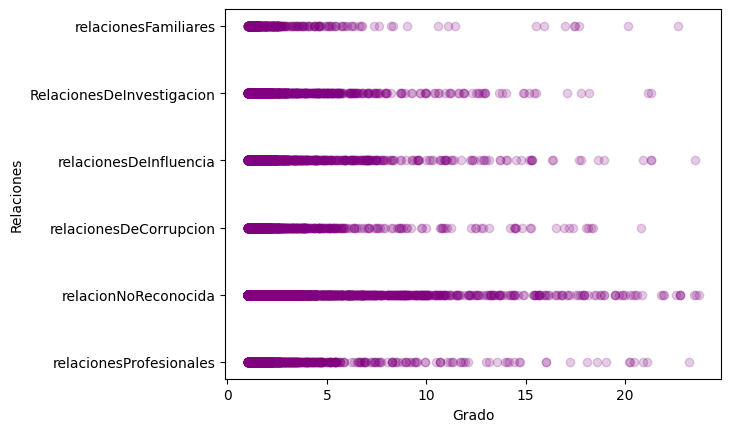

In [155]:
# Grafica las muestras
plt.scatter(random_numbers2, estado_aleatorio, alpha=0.2, color = 'purple')
plt.xlabel('Grado')
plt.ylabel('Relaciones')
plt.show()

In [156]:
# Define los rangos de interés
def p_conjunta(v1,v2,v3):
  range_A = (v1,v2)
  range_B = v3

#pares_filtrados = [(a, b) for a, b in Muestras_conjuntas if (a == range_B or a == 'relacionesDeCorrupcion') and range_A[0] <= b <= range_A[1]]
  pares_filtrados = [(a, b) for a, b in Muestras_conjuntas if (a == range_B ) and range_A[0] <= b <= range_A[1]]
#pares_filtrados = [(a, b) for a, b in Muestras_conjuntas if range_A[0] <= b <= range_A[1]]

# La longitud de 'pares_filtrados' es la cantidad de pares que cumplen con la condición
  cantidad_pares = len(pares_filtrados)
  print(cantidad_pares)
# Calcula la probabilidad
  probability = cantidad_pares / len(Muestras_conjuntas)
  return probability

print("Probabilidad estimada: ", p_conjunta(1,15,'relacionesDeInfluencia')*100, '%')

1330
Probabilidad estimada:  13.3 %


In [163]:
print("Probabilidad k=1 dado : ", p_conjunta(1,2,'relacionesDeInfluencia')*100/0.1345, '%')
print(power_law(2, params[0], params[1])/max(frecuencias))

811
Probabilidad k=1 dado :  60.297397769516735 %
0.3963196805816502


In [158]:
print(frecuencias_relaciones)
print(frecuencias_relaciones.values())

{'relacionesProfesionales': 0.106, 'relacionNoReconocida': 0.4953, 'relacionesDeCorrupcion': 0.0951, 'relacionesDeInfluencia': 0.1345, 'RelacionesDeInvestigacion': 0.1228, 'relacionesFamiliares': 0.0463}
dict_values([0.106, 0.4953, 0.0951, 0.1345, 0.1228, 0.0463])


In [165]:
#Muestras conjuntas
Muestras_conjuntas2=list(zip(estado_aleatorio,np.ceil(random_numbers2)))

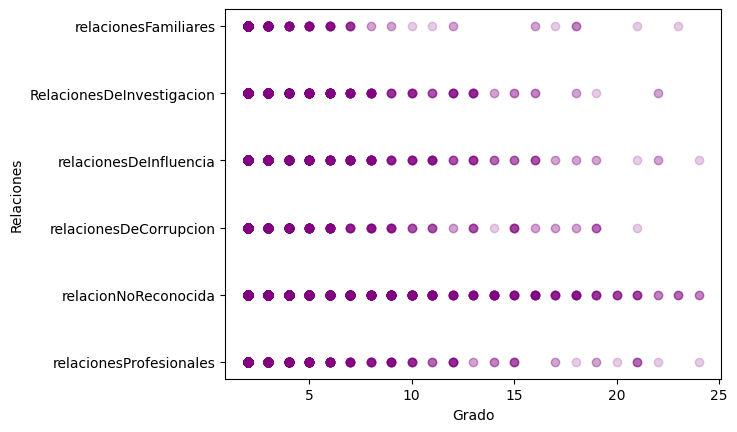

In [166]:
# Grafica las muestras
plt.scatter(np.ceil(random_numbers2), estado_aleatorio, alpha=0.2, color = 'purple')
plt.xlabel('Grado')
plt.ylabel('Relaciones')
plt.show()

In [169]:
# Define los rangos de interés
def p_conjuntaDisc(v1,v3):
  range_A = v1
  range_B = v3

#pares_filtrados = [(a, b) for a, b in Muestras_conjuntas if (a == range_B or a == 'relacionesDeCorrupcion') and range_A[0] <= b <= range_A[1]]
  pares_filtrados = [(a, b) for a, b in Muestras_conjuntas if (a == range_B ) and b == v1]
#pares_filtrados = [(a, b) for a, b in Muestras_conjuntas if range_A[0] <= b <= range_A[1]]

# La longitud de 'pares_filtrados' es la cantidad de pares que cumplen con la condición
  cantidad_pares = len(pares_filtrados)
  print(cantidad_pares)
# Calcula la probabilidad
  probability = cantidad_pares / len(Muestras_conjuntas)
  return probability

print("Probabilidad estimada: ", p_conjuntaDisc(2,'relacionesDeInfluencia')*100, '%')

811
Probabilidad estimada:  8.110000000000001 %


In [170]:
print("Probabilidad k=2 dado Influencia: ", p_conjuntaDisc(2,'relacionesDeInfluencia')*100/0.1345, '%')
print(power_law(2, params[0], params[1])/max(frecuencias))

811
Probabilidad k=2 dado :  60.297397769516735 %
0.3963196805816502
